# Calculating Customer's Life Time Value Using BG/NBD and GAMMA-GAMMA In Python

In [2]:
from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# !pip install Lifetimes
from lifetimes import BetaGeoFitter

## importing the DataSet

In [3]:
df = pd.read_csv('C:/Users/nitun/OneDrive/Desktop/Data Analysis Digi Notes/Projects/project7/lifeTimeVale/customer_segmentation.csv'
                ,encoding='iso-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Data Cleaning

In [4]:
#Finding the null values
def findNull(df):
    missing_count = df.isnull().sum()
    value_count = df.isnull().count()
    percentage = round((missing_count / value_count) *100,2)
    # print(f"{round((missing_count / value_count) *100,2)}")

    missingDf = pd.DataFrame(({'count':missing_count,'percetage':percentage}))
    return missingDf

In [5]:
#Removing empty cutsomer ID colummns as there will be no significance of it without ID
df.dropna(subset='CustomerID' , inplace=True)
findNull(df)

,count,percetage
InvoiceNo,0,0.0
StockCode,0,0.0
Description,0,0.0
Quantity,0,0.0
InvoiceDate,0,0.0
UnitPrice,0,0.0
CustomerID,0,0.0
Country,0,0.0


(array([4.06819e+05, 7.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.,  3897.,  7794., 11691., 15588., 19485., 23382., 27279.,
        31176., 35073., 38970.]),
 <BarContainer object of 10 artists>)

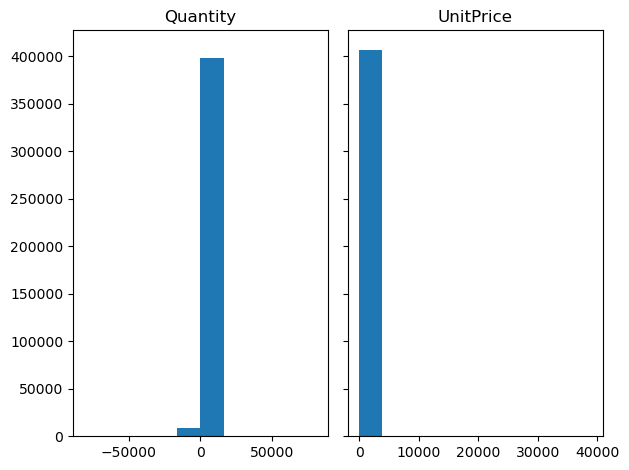

In [6]:
#checking data distribution
fig , ax = plt.subplots(1,2, sharey=True, tight_layout=True)
ax[0].set_title('Quantity')
ax[0].hist(df['Quantity'])
ax[1].set_title('UnitPrice')
ax[1].hist(df['UnitPrice'])


## insights:
#### The quntity having some -ve values, and those won't be wroth considering

In [7]:
df = df.loc[df['Quantity'] > 0]

In [8]:
df = df.loc[df['UnitPrice'] > 0]

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [10]:
print(f"max date: {df['InvoiceDate'].max()} , min date :{df['InvoiceDate'].min()}")

max date: 2011-12-09 12:50:00 , min date :2010-12-01 08:26:00


<AxesSubplot:xlabel='InvoiceDate'>

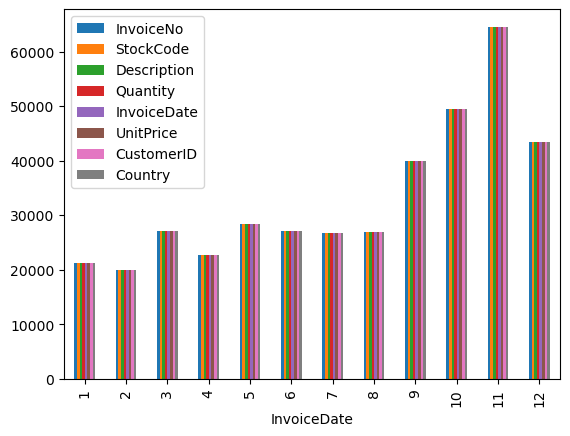

In [11]:
df.groupby(df["InvoiceDate"].dt.month).count().plot(kind="bar")

In [12]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

<div>
    <h2>Adding a New Column for Total Revenue in a Pandas DataFrame</h2>
    <p style="color:blue">To calculate the customer's lifetime value, it's important to have access to the total revenue generated by each customer. However, this information may not be readily available in our dataset. In this case, we can add a new column for Total Revenue by multiplying the Quantity and Unit Price columns together.</p>
</div>

In [14]:

df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]


#### Transforming transactional data into the recency, frequency, monetary, and tenure (T) metrics is a necessary step in providing the data needed for customer lifetime value (CLV) models. These RFMT metrics allow us to analyze customer behavior and predict their future value to the business.

In [15]:
from lifetimes.utils import summary_data_from_transaction_data
cltv_df = summary_data_from_transaction_data(df,'CustomerID','InvoiceDate','TotalPrice',observation_period_end='2011-12-09 12:50:00')


In [16]:
cltv_df

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,365.0,367.0,599.701667
12348.0,3.0,283.0,358.0,301.480000
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000
...,...,...,...,...
18280.0,0.0,0.0,277.0,0.000000
18281.0,0.0,0.0,180.0,0.000000
18282.0,1.0,119.0,126.0,77.840000


#### visualize the recency , frequency and monetary value

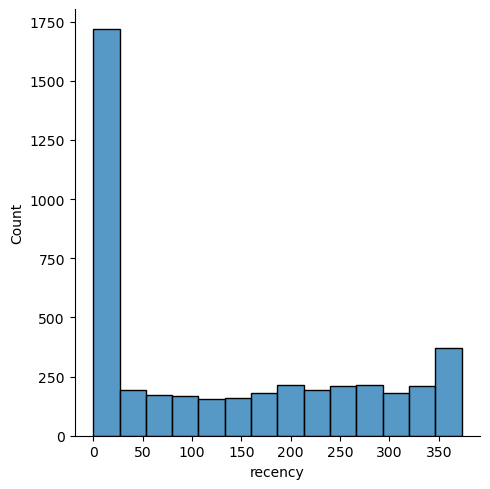

In [17]:
import seaborn as sns
ax = sns.displot(cltv_df['recency'])

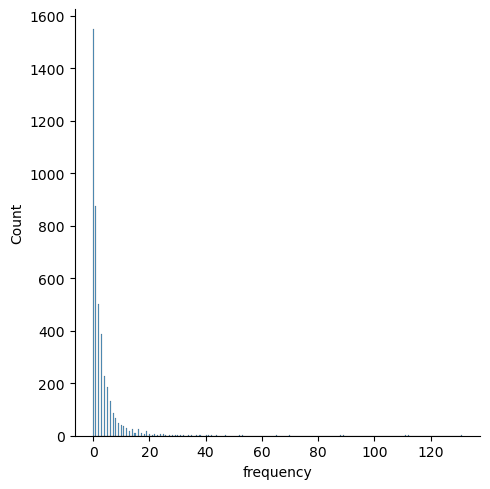

In [18]:
ax = sns.displot(cltv_df['frequency'])

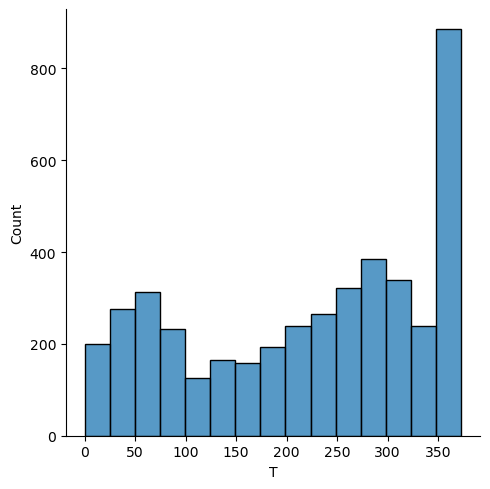

In [19]:
ax = sns.displot(cltv_df['T'])

In [20]:
cltv_df

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,365.0,367.0,599.701667
12348.0,3.0,283.0,358.0,301.480000
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000
...,...,...,...,...
18280.0,0.0,0.0,277.0,0.000000
18281.0,0.0,0.0,180.0,0.000000
18282.0,1.0,119.0,126.0,77.840000


<ul><li><code>r</code>: the probability that a customer is "alive" after their first purchase. A higher <code>r</code> value indicates higher customer retention.</li><li><code>alpha</code>: the expected number of purchases made by a customer before becoming inactive. A higher <code>alpha</code> value indicates higher customer loyalty or purchase frequency.</li><li><code>a</code>: the parameter controlling the variability of customer lifetime. It measures the extent to which customers differ from one another in terms of their lifetime. A positive <code>a</code> value indicates greater heterogeneity among customers' lifetime values.</li><li><code>b</code>: the parameter controlling the variability of the purchase process. It measures the extent to which the number of purchases made by a customer varies over time. A positive <code>b</code> value indicates greater variability in the purchase process over time.</li></ul>

In [21]:
bgf = BetaGeoFitter(penalizer_coef=0)
bgf.fit(cltv_df['frequency'],cltv_df['recency'],cltv_df['T'])
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.826542,0.026785,0.774044,0.879040
alpha,68.905121,2.611786,63.786020,74.024221
a,0.003437,0.010339,-0.016828,0.023702
b,6.745116,22.414725,-37.187745,50.677978


<AxesSubplot:title={'center':'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

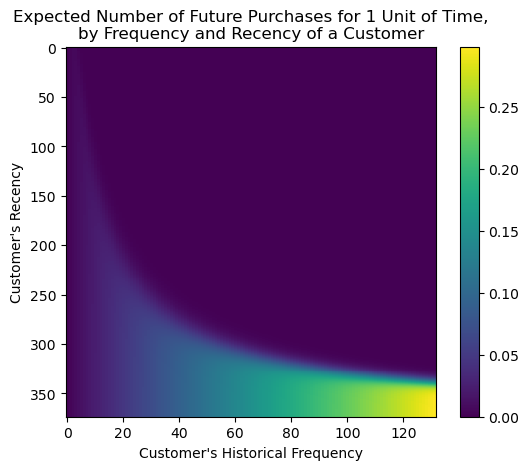

In [22]:
from lifetimes.plotting import plot_frequency_recency_matrix
plot_frequency_recency_matrix(bgf)

<AxesSubplot:title={'center':'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

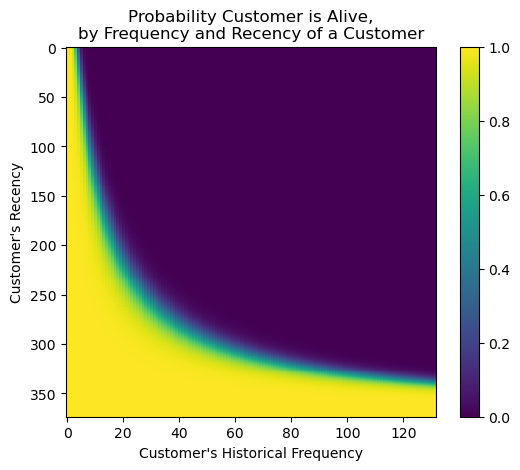

In [23]:
from lifetimes.plotting import plot_probability_alive_matrix
plot_probability_alive_matrix(bgf)

### Predicting customer's future number of purchases over 90 days

In [43]:
cltv_df['predicted_purc'] = bgf.conditional_expected_number_of_purchases_up_to_time(90,cltv_df['frequency'],
                                                                                   cltv_df['recency'],cltv_df['T'])

In [45]:
cltv_df['predicted_purc'].max()

cltv_df[cltv_df['predicted_purc']> 15]

,frequency,recency,T,monetary_value,predicted_purc
CustomerID,,,,,
12748.0,112.0,373.0,373.0,301.024821,22.970742
14606.0,88.0,372.0,373.0,135.890114,18.084276
14911.0,131.0,372.0,373.0,1093.661679,26.838843
15311.0,89.0,373.0,373.0,677.729438,18.288020
17841.0,111.0,372.0,373.0,364.452162,22.766952


<AxesSubplot:xlabel='predicted_purc', ylabel='Count'>

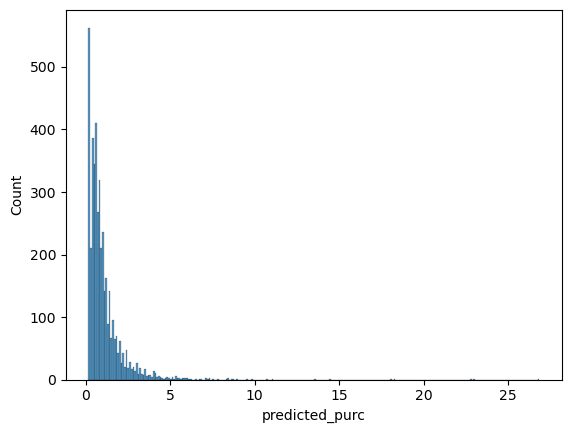

In [46]:

sns.histplot(cltv_df['predicted_purc'])

<AxesSubplot:title={'center':'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

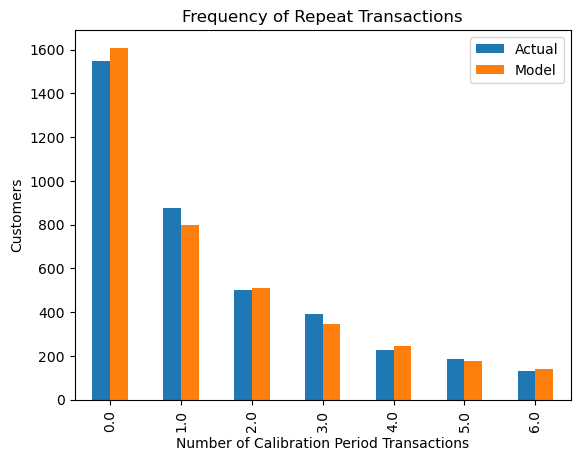

In [47]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

In [49]:
cltv_df[['monetary_value','frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.046189
frequency,0.046189,1.000000


In [53]:
returnigCustomer = cltv_df[(cltv_df['frequency'] > 0) & (cltv_df['monetary_value']  > 0) ]

In [54]:
returnigCustomer.head()

,frequency,recency,T,monetary_value,predicted_purc
CustomerID,,,,,
12347.0,6.0,365.0,367.0,599.701667,1.408736
12348.0,3.0,283.0,358.0,301.480000,0.805907
12352.0,6.0,260.0,296.0,368.256667,1.682277
12356.0,2.0,303.0,325.0,269.905000,0.645368
12358.0,1.0,149.0,150.0,683.200000,0.750390


In [55]:
returnigCustomer[['monetary_value','frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.015906
frequency,0.015906,1.000000


In [56]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(returnigCustomer['frequency'],
        returnigCustomer['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 2790 subjects, p: 2.10, q: 3.45, v: 485.89>

In [57]:
predicted_monetary = ggf.conditional_expected_average_profit(
        returnigCustomer['frequency'],
        returnigCustomer['monetary_value']
)

In [58]:
aov_df = pd.DataFrame(predicted_monetary,columns = ['aov'])
aov_df = aov_df.sort_values(by='aov', ascending=False)

#### expected_average_profit

In [59]:
aov_df.head()

,aov
CustomerID,
16446.0,78026.825868
15749.0,10170.076618
18102.0,8951.640509
12415.0,7323.629188
17450.0,7104.927026


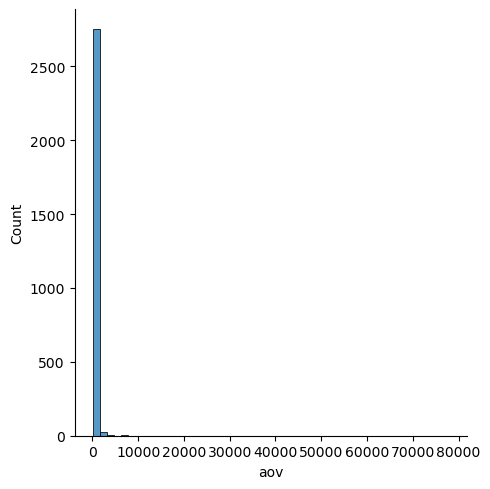

In [63]:
sns.displot(aov_df['aov'],bins = 50)

In [64]:
aov_df['aov_bin'] = pd.qcut(aov_df['aov'], q=5, labels=[1, 2, 3, 4, 5])
aov_df = aov_df.reset_index()

In [66]:
aov_df.groupby('aov_bin').agg(
    count=('CustomerID', 'count'),
    min_aov=('aov', min),
    max_aov=('aov', max),
    std_aov=('aov', 'std'),    
    aov=('aov', 'mean')
).sort_values(by='aov')

,count,min_aov,max_aov,std_aov,aov
aov_bin,,,,,
1,558,47.057076,262.792737,33.137207,220.976848
2,558,262.815828,315.255356,14.684250,288.626769
3,558,315.278447,378.279844,18.112394,346.562608
4,558,378.469118,480.344304,29.044227,420.948722
5,558,480.892078,78026.825868,3373.549841,995.855001


## Predicting customer lifetime value

In [67]:
bgf.fit(returnigCustomer['frequency'], 
        returnigCustomer['recency'], 
        returnigCustomer['T'])

<lifetimes.BetaGeoFitter: fitted with 2790 subjects, a: 0.01, alpha: 108.92, b: 0.16, r: 1.94>

In [74]:
preds = ggf.customer_lifetime_value(
    bgf,
    returnigCustomer['frequency'],
    returnigCustomer['recency'],
    returnigCustomer['T'],
    returnigCustomer['monetary_value'],
    time = 6,
    discount_rate = 0.01
)

preds = preds.to_frame().reset_index()


### model predicts your best customers to be over the next 6 months

In [92]:
preds = preds.sort_values('clv',ascending=False)
#Top 10
preds.head(10)

,CustomerID,clv
1938,16446.0,119772.959781
1111,14646.0,107010.652188
2706,18102.0,87930.887513
2413,17450.0,72366.887206
834,14096.0,56574.259601
1243,14911.0,52084.234548
34,12415.0,48211.952119
864,14156.0,43259.807976
2441,17511.0,33196.143285
1745,16029.0,28399.389488


In [76]:
preds.tail(10)

,CustomerID,clv
20,12386.0,100.306044
310,12967.0,92.577008
108,12559.0,89.251751
1385,15224.0,84.641944
2346,17334.0,81.023432
1379,15213.0,76.812395
2530,17691.0,72.744157
1329,15107.0,70.401910
1963,16499.0,66.364381
1430,15332.0,54.400114


Text(0.5, 1.0, ' Customers by CLV')

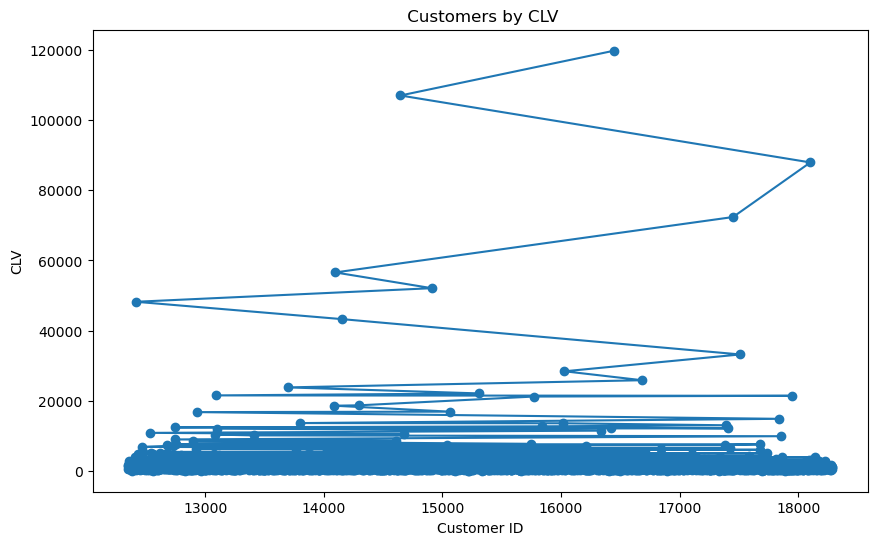

In [91]:
plt.figure(figsize=(10,6))
plt.plot(preds['CustomerID'], preds['clv'],marker='o')
plt.xlabel('Customer ID')
plt.ylabel('CLV')
plt.title(' Customers by CLV')